In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import json

from pprint import pprint

In [10]:
def JSONParser(data):
    j = json.loads(data)
    if j: 
        return j
    else:
        return None

converters={"url": str,
       "doi": str,
       "og_id": str,
       "oh_obj":JSONParser,
       "fb_comments":str,
       "fb_comment_plugins":str,
       "fb_reactions":str,
       "fb_shares":str,
       "am_posts":str,
       "am_response":JSONParser,
        "timestamp":str}

df = pd.read_csv("state_oa.csv", converters=converters)

wos = pd.read_csv("../data/wos_100k.csv", encoding = 'utf8')
df = df.merge(wos, on="doi")

In [11]:
df.am_posts = pd.to_numeric(df.am_posts, errors='coerce')

df.fb_shares = pd.to_numeric(df.fb_shares, errors='coerce')
df.fb_reactions = pd.to_numeric(df.fb_reactions, errors='coerce')
df.fb_comment_plugins = pd.to_numeric(df.fb_comment_plugins, errors='coerce')
df.fb_comments = pd.to_numeric(df.fb_comments, errors='coerce')

df.fb_total = pd.to_numeric(df.fb_shares + df.fb_reactions + df.fb_comment_plugins + df.fb_comments, errors='coerce')

In [14]:
df.columns

Index(['doi', 'url', 'og_id', 'og_obj', 'fb_comments', 'fb_comment_plugins',
       'fb_reactions', 'fb_shares', 'am_posts', 'am_response', 'timestamp',
       'evidence', 'oa_color_long', 'best_open_url', 'year', 'found_green',
       'journal', 'publisher', 'license', 'random'],
      dtype='object')

# Total dataset

+ I forgot to save the error messages... Maybe for a later re-run of the crawler :/

In [73]:
min_year = 2008
max_year = 2015

# Excluded < 2008 and > 2015 in the following plots because of the small n in those years

df.groupby(['year'])[['doi','am_posts', 'fb_shares']].count()

,doi,am_posts,fb_shares
year,,,
1969.0,3,0,3
1970.0,2,0,0
1996.0,3,1,3
2007.0,21,1,2
2008.0,741,10,115
2009.0,12780,156,2867
2010.0,13489,196,3132
2011.0,14450,426,3277
2012.0,15359,966,3340


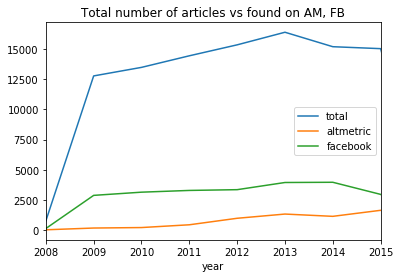

In [90]:
df.groupby(['year'])[['doi','am_posts', 'fb_shares']].count().plot();
plt.xlim([min_year, max_year]);
plt.gca().legend(labels=["total", "altmetric", "facebook"]);
plt.title("Total number of articles vs found on AM, FB");

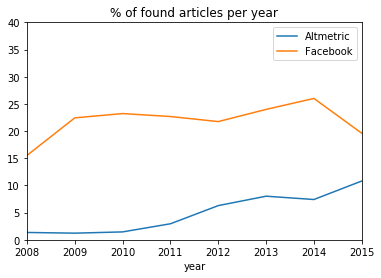

In [75]:
per_year = df.groupby(['year'])['doi'].nunique()
am_count = df.groupby(['year'])['am_posts'].count()
fb_count = df.groupby(['year'])['fb_shares'].count()
pd.DataFrame({'Altmetric':100*am_count/per_year, 'Facebook':100*fb_count/per_year}).plot()
plt.xlim([min_year, max_year]);
plt.ylim([0,40]);
plt.title("% of found articles per year");

# Mean and Median shares per year

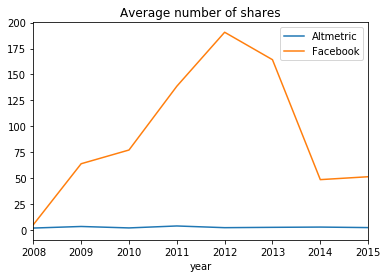

In [88]:
df.groupby(['year']).mean()[['am_posts', 'fb_shares']].plot();
plt.xlim([min_year, max_year]);
plt.title("Average number of shares")
plt.gca().legend(labels=["Altmetric", "Facebook"]);

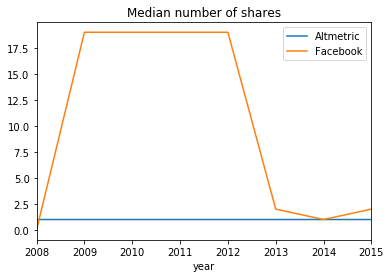

In [89]:
df.groupby(['year']).median()[['am_posts', 'fb_shares']].plot();
plt.xlim([min_year, max_year]);
plt.title("Median number of shares");
plt.gca().legend(labels=["Altmetric", "Facebook"]);

# Found articles per OA color

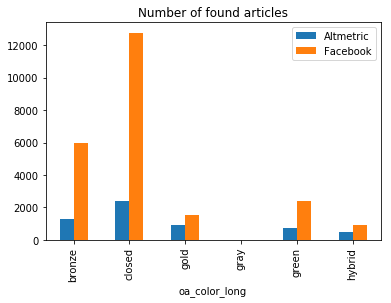

In [22]:
df.groupby(['oa_color_long'])[['am_posts', 'fb_shares']].count().plot(kind="bar");
plt.title("Number of found articles")
plt.gca().legend(labels=["Altmetric", "Facebook"]);

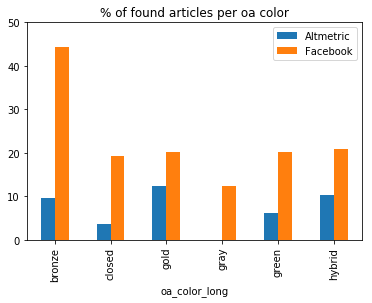

In [44]:
per_year = df.groupby(['oa_color_long'])['doi'].nunique()
am_count = df.groupby(['oa_color_long'])['am_posts'].count()
fb_count = df.groupby(['oa_color_long'])['fb_shares'].count()

pd.DataFrame({'Altmetric':100*am_count/per_year, 'Facebook':100*fb_count/per_year}).plot(kind="bar")
plt.ylim([0,50]);
plt.title("% of found articles per oa color");

# Mean and Median shares across OA colors

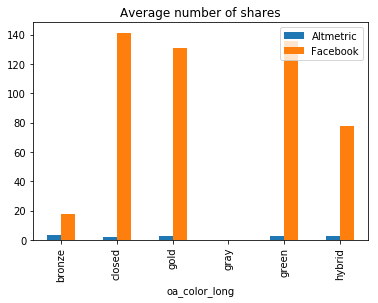

In [25]:
df.groupby(['oa_color_long']).mean()[['am_posts', 'fb_shares']].plot(kind="bar");
plt.title("Average number of shares")
plt.gca().legend(labels=["Altmetric", "Facebook"]);

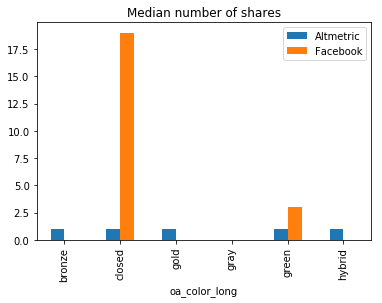

In [26]:
df.groupby(['oa_color_long']).median()[['am_posts', 'fb_shares']].plot(kind="bar");
plt.title("Median number of shares");
plt.gca().legend(labels=["Altmetric", "Facebook"]);

# Number of articles found for year & OA color

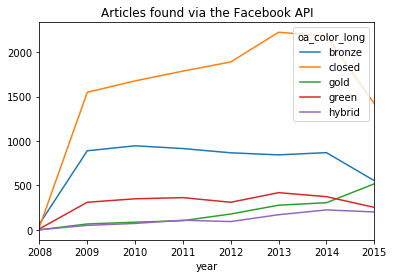

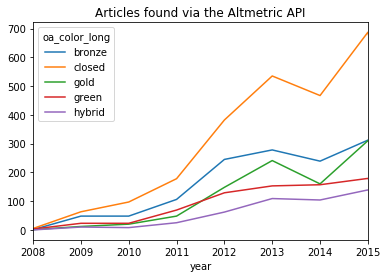

In [79]:
df.groupby(['year','oa_color_long'])['fb_shares'].count().unstack().plot()
plt.xlim([min_year, max_year]);
plt.title("Articles found via the Facebook API");
df.groupby(['year','oa_color_long'])['am_posts'].count().unstack().plot()
plt.xlim([min_year, max_year]);
plt.title("Articles found via the Altmetric API");

# % of found articles on Facebook/Altmetric across years & OA color

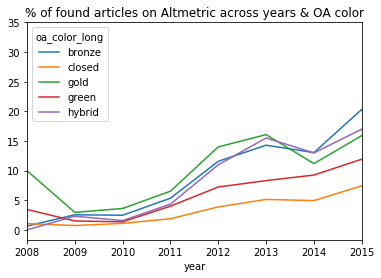

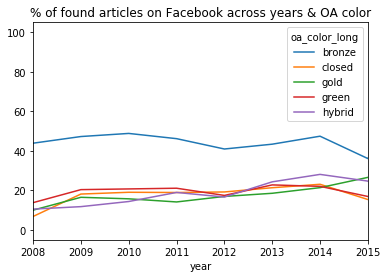

In [92]:
per_year = df.groupby(['year','oa_color_long'])['doi'].nunique()
am_count = df.groupby(['year','oa_color_long'])['am_posts'].count()
fb_count = df.groupby(['year','oa_color_long'])['fb_shares'].count()

(100*am_count.unstack()/per_year.unstack()).plot();
plt.xlim([min_year, max_year])
plt.title("% of found articles on Altmetric across years & OA color")

(100*fb_count.unstack()/per_year.unstack()).plot();
plt.xlim([min_year, max_year]);
plt.title("% of found articles on Facebook across years & OA color");

# Average number of shares across years & OA color

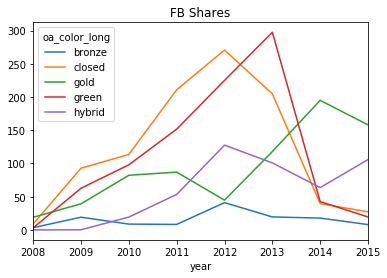

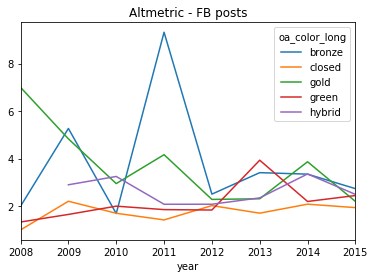

In [86]:
df.groupby(['year','oa_color_long'])['fb_shares'].mean().unstack().plot()
plt.xlim([min_year, max_year]);
plt.title("FB Shares");
df.groupby(['year','oa_color_long'])['am_posts'].mean().unstack().plot()
plt.xlim([min_year, max_year]);
plt.title("Altmetric - FB posts");

# Median number of shares across years & colors

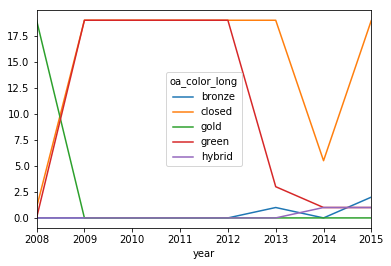

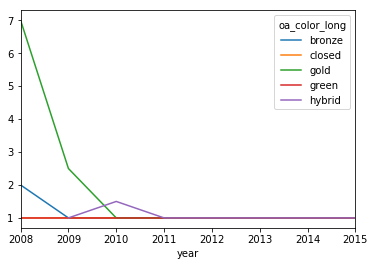

In [87]:
df.groupby(['year','oa_color_long'])['fb_shares'].median().unstack().plot()
plt.xlim([min_year, max_year]);
df.groupby(['year','oa_color_long'])['am_posts'].median().unstack().plot()
plt.xlim([min_year, max_year]);